# 逻辑回归

In [2]:
import numpy as np

#pip install matplotlib
import matplotlib.pyplot as plt

# 定义X，此时X为二维数据，平面上的。可以可视化为x, y

In [3]:
X = np.array([
    (0.5, 0.5), 
    (0.5, 1.0),
    (0.5, 1.5), 
    (0.8, 2.0), 
    (0.6, 1.2), 
    (0.9, 1.3), 
    (1.2, 0.9), 
    (1.5, 0.5) , 
    (1.1, 2.9), 
    (1.5, 3.0), 
    (1.6, 2.5), 
    (1.8, 2.0), 
    (1.9, 3.1), 
    (2.3, 2.8), 
    (2.3, 1.6), 
    (2.9, 1.5)
], np.float32)

In [4]:
label = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]], np.float32).T

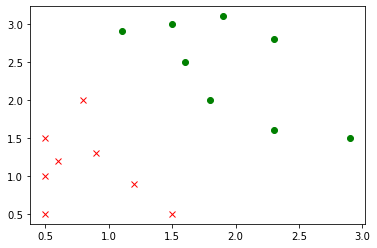

In [5]:
positive = X[label[:, 0]==1]
negative = X[label[:, 0]==0]
plt.plot(positive[:, 0], positive[:, 1], "go")
plt.plot(negative[:, 0], negative[:, 1], "rx")

# 定义参数W

In [8]:
num_sample  = X.shape[0]
num_feature = X.shape[1]
num_hidden  = 32
num_output  = 1
batch_size  = num_sample

# 创建X_hat，增加1维度。0的位置插入一列，值全部为1
X_hat = np.insert(X, 0, values=1, axis=1)

# 创建W权重，为theta
W1 = np.random.normal(0, 1, size=(1 + num_feature, num_hidden))
W2 = np.random.normal(0, 1, size=(1 + num_hidden, num_output))

lr = 0.1
epochs = 1000

# 定义变换压缩函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def desigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

for i in range(epochs):
    
    o1_hidden  = X_hat @ W1
    if(i == 0):
        print(o1_hidden.shape, o1_hidden)
    o1_hidden_activation = sigmoid(o1_hidden)
    o1_hidden_activation_hat = np.insert(o1_hidden_activation, 0, values=1, axis=1)
    
    o2_output  = o1_hidden_activation_hat @ W2
    probability = sigmoid(o2_output)
    
#     if (i+1)%200 == 0 or i%5==0 and (i/5)<3:
#         print('x', X_hat.shape)
#         print('a1', o1_hidden.shape)
#         print('o1', o1_hidden_activation.shape)
# #         print('a2', o2_output)
#         print('o2', len(probability[probability[:,0]>=0.5]))
    
    # 二元交叉熵
    loss = -np.sum(label * np.log(probability) + (1 - label) * np.log(1 - probability)) / batch_size
    
    # 对o2部分求导
    delta_o2_output = (probability - label) / batch_size
    delta_W2        = o1_hidden_activation_hat.T @ delta_o2_output
    
    # 对o1部分求导
    delta_o1_hidden_activation_hat = delta_o2_output @ W2.T
    delta_o1_hidden                = delta_o1_hidden_activation_hat[:, 1:] * desigmoid(o1_hidden)
    delta_W1                       = X_hat.T @ delta_o1_hidden
    
    # 更新参数
    W1 = W1 - lr * delta_W1
    W2 = W2 - lr * delta_W2
    
    if (i + 1) % 100 == 0 or i % 5 == 0 and (i / 5) < 3:
        correct = np.sum((probability[:, 0]>=0.5) & (label[:, 0] == 1)) + np.sum((probability[:, 0]<0.5) &  (label[:, 0] == 0))
        accuracy = correct / len(X)
        print(f"Iter: {i}, Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")

(16, 32) [[-2.29315133e-01  6.22860215e-01 -1.82349319e+00  3.07548478e+00
   3.37822176e-01  7.91609479e-02  1.24468011e+00  3.30483818e-01
  -4.43793078e-01 -5.97319626e-02  4.72703563e-01 -8.14547015e-01
   1.65672335e-01  3.78153869e-01 -2.32360353e-01 -1.45306887e+00
   3.35890041e-01 -1.63303239e-01  8.74910426e-01 -2.57200539e+00
   3.99071307e-02  7.85160859e-01  7.45812503e-01  2.52670777e-01
   2.41014511e-01  8.33545940e-02 -1.50440206e-01  2.07369844e+00
   1.16153207e-01  2.17514080e-01  9.53645429e-02 -1.16995045e+00]
 [-3.17746624e-01  1.55529057e+00 -2.11202538e+00  3.27270507e+00
   5.40070191e-01  2.05201255e-01  8.02639057e-01 -1.70093195e-02
  -1.10593114e-01  2.03200927e-01  7.35907259e-01 -9.88817550e-01
   1.51125501e-01  7.22644494e-01 -1.45346423e-01 -1.45662833e+00
   5.59470135e-01 -1.16415866e+00  1.62114660e+00 -2.62833794e+00
   2.49956796e-01  1.60259674e+00  4.27312869e-01  8.65601352e-02
   5.81115902e-01  9.42397983e-02  3.06974082e-01  2.89797861e+00


In [17]:
7/5

1.4